# Logistic Regression

## Theory

The linear regression model assumes that the target variable $Y$ is quantitative. When $Y$ is qualitative or categorical we need to consider the _classification_ approaches. Most widely used classifiers are _logistic regression_, _linear discriminant analysis_, and _K-nearest neighbors_.

Some examples of classification problems:
* Spam versus "Ham" emails.
* Loan Default (Yes/No).
* Disease Diagnosis (Yes/No).

Note that all the examples above are examples of _binary classification_ problems where we mainly have two classes (0 and 1).

### Simple Logistic Regression

The _Logistic Regression_ models the _probability_ that $Y$ belongs to a particular category (for now we assume a binary response category). Therefore, it should output a value between 0 and 1 indicating a probability.

#### The Logistic Function
The Sigmoid (aka _logistic fuction_) takes in any value and outputs it to be between 0 and 1 as shown below:
<img src="sigmoid.JPG" alt="drawing" width="300px"/>

Hence, we can take the linear regression solution and place it into the Sigmoid function:

<img src="logisticFunc.JPG" alt="drawing" width="300px"/>

Considering a single feature problem, the _logistic fuction_ to predict this probability is as follows:

$$p(X) = \frac{e^{\beta_0 + \beta_1X}}{1 + e^{\beta_0 + \beta_1X}}$$

Here is an example of logistic regression using a single feature (Balance) on a binary target (Default = Yes/No)

<img src="example.JPG" alt="drawing" width="300px"/>

It can be seen that the logistic regression model remains in between $0$ and $1$. Hence, we can set a cuttoff point at $0.5$, anything below it results in class $0$, and anything above is class $1$.

#### Calculating the Odds
_odds_ is a measure that can take a value between $0$ and $\infty$, indicating very low and very high probability that   $Y$ belongs to a particular category. It is calculated as follows:

$$\frac{p(X)}{1-p(X)} = e^{\beta_0 + \beta_1X}$$

Odds are traditionally used instead of probabilities in horse-racing, since they relate more naturally to the correct betting strategy.

#### Calculating the Logits

By taking the logarithm of both sides we can calculate _log-odds_ or _logits_:
$$log \left (\frac{p(X)}{1-p(X)} \right ) = \beta_0 + \beta_1X$$

#### How to Interpret the Coefficients
In a linear regression model, $\beta_1$ gives the
average change in $Y$ associated with a one-unit increase in $X$. In contrast, in a logistic regression model, increasing $X$ by one unit changes the log odds by $\beta_1$ , or equivalently it multiplies the odds by $e^{\beta_1}$ .

#### Estimating the Regression Coefficients

The coefficients $\beta_0$ and $\beta_1$ are unknown, and must be estimated based on the available training data. To fit this model we use a method called _maximum likelihood_. The _likelihood function_ is defined as follows:

$$l(\beta_0,\beta_1) = \prod_{i:y_i=1} p(x_i) \prod_{{i}':y_{{i}'}=0}(1 - p(x_{{i}'}))$$

The estimates of $\beta_0$ and $\beta_1$ are chosen in a way to maximize this _likelihood function_.

#### Calculating the Standard Error
In Logistic regression the accuracy of the coefficient estimates is measured by computing their _standard errors_:

$$SE(\beta_0)^2 = \sigma^2 \left [\frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^{n}(x_i - \bar{x})^2} \right ]$$

$$SE(\beta_1)^2 = \frac{\sigma^2}{\sum_{i=1}^{n}(x_i - \bar{x})^2} $$

where $\sigma^2 = Var(\varepsilon)$. In general, $\sigma^2$ is not known, but can be estimated from the data. The estimate
of $\sigma$ is known as the _residual standard error_, and is given by the following formula:

$$RSE = \sqrt{RSS/(n − 2)}$$

where RSS is the _residual sum of squares_ and is calculated as follows:
$$RSS = \sum_{i=1}^{n} (y_i - \hat{y_i})^2$$

#### Null Hypothesis Testing
The _z-statistic_  plays the same role as the _t-statistic_
in the linear regression output.

the z-statistic associated with $\beta_1$ is equal to $\beta_1/SE(\beta_1)$, and so a large (absolute) value of the z-statistic indicates evidence against the null hypothesis $H_0 : \beta_1 = 0$. Note that the null hypothesis assumes there is np association between $X$ and $Y$.

#### Interpreting p-value
_p-value_ is the probability of observing any value equal to $|z|$ or larger, assuming $\beta_1 = 0$. 

We reject the _null hypothesis_—that is, we declare a relationship to exist between $X$ and $Y$ —if the _p-value_ is small enough. Typical _p-value_ cutoffs for rejecting the _null hypothesis_ is $1\%$.

### Multiple Logistic Regression
We now consider the problem of predicting a binary response using multiple predictors. In this case, we can calculate the _logits_ as follows:

$$log \left (\frac{p(X)}{1-p(X)} \right ) = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p$$

and the probability that $Y$ belongs to a certain category can be generalized as follows:

$$p(X) = \frac{e^{\beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p}}{1 + e^{\beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p}}$$

The _maximum likelihood_ method will be used to estimate $\beta_0 + \beta_1 + \beta_2 + ... + \beta_p$.

### Logistic Regression for >2 Response Classes
The two-class logistic regression models have multiple-class
extensions, but in practice they tend not to be used all that often as there are other more popular approaches for multiple-class classification such as _discriminant analysis_.

### Model Evaluation

After training a logistic regression on the training data, we will evaluate the models performance on the test data. 

You can use a _confusion matrix_ to evaluate classification models. A _confusion matrix_ is a table showing _false negatives_, _true negatives_, _false positives_ and _true positives_ comparing the model predictions and the actual response on the test data. In other words, it shows the number of times the model has classified correctly or mis-classified our data.

#### Basic Terminology in Confusion matrices
* True Positives (TP): model predicted Yes, actual respose is also Yes.
* True Negatives (TN): model predicted No, actual response is also No.
* False Positives (FP): model predicted Yes, but actual response is No. Also known as the Type-1 error.
* False Negatives (FN): model predicted No, but the actual response is Yes. Also known as the Type-2 error.

#### Measures: Accuracy
It refers to how often the model prediction is correct:

$$Accuracy = \frac{(TP + TN)}{Total}$$

#### Measures: Mis-classification Rate
It refers to how often the model prediction is wrong

$$Misclassification = \frac{(FP+FN)}{Total}$$


## Logistic Regression in Python

We will be working with a semi-cleaned version of the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). We'll try to predict a classification- survival or deceased based on the features we have in the dataset.


### Import Libraries
Let's import some libraries to get started!

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

### Reading the data
we read the CSV files into pandas dataframes. The test and train datasets are already separated into two different csv files.

In [4]:
titanic_data = pd.read_csv('titanic.csv')

In [5]:
titanic_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Exploratory Data Analysis

We start by checking the missing data.

#### Missing Data

To see where we have missing data we can use Seaborn to draw a heatmap as follows:

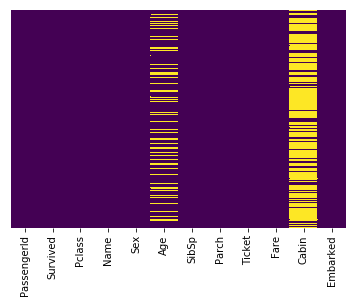

In [7]:
sns.heatmap(titanic_data.isnull(), 
            yticklabels=False, cbar=False, cmap='viridis')

As we can see in the heatmap, the _Age_ and the _Cabin_ features include the most null values. For the _Age_ feature, the proportion of the missing data is small enough to be able to fix them using one of the approaches to replace null values. For the _Cabin_ feature however, we have too many null values that we hardly can get any useful information from the remaining values. We would probably have to completely drop this feature, or to change it to another feature that can be interpreted, such as, a binary feature indicating if we have Cabin info or not. 

We go on with analysing the data with some bar charts. First we want to look at the number of people survived versus number of people deseased.

In [8]:
sns.set_style('whitegrid')

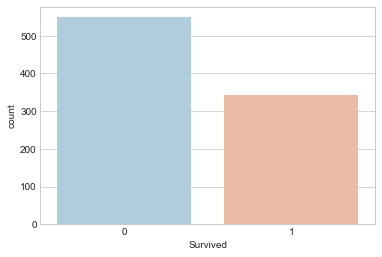

In [9]:
sns.countplot(x='Survived', data=titanic_data,palette='RdBu_r')

Here we can see that number of people deseased is much more than people who survived.

Let's look at the survivals per sex:

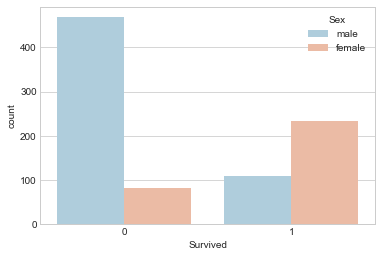

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex',
              data=titanic_data, palette='RdBu_r')

Here we can see that the survival rates have been higher for the female passengers, and we have more deseased persons among the male passengers.

Now we take a look at the survival numbers per _passenger class_.

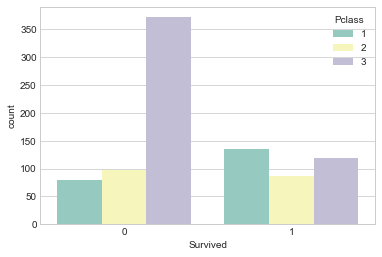

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass',
             data=titanic_data, palette='Set3')

Here we can see that the most deseased passengers were from the _Passenger Class_ $3$ (lowest class). The survived numbers are slightly higher on _Passenger Class_ $1$. We also have to see how many people were actually in each _Passenger Class_.

Let's get an idea about the age of people on the Titanic:

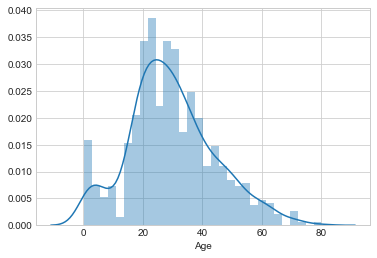

In [13]:
sns.distplot(a=titanic_data['Age'].dropna(), bins=30)

As you can see from the histogram, we have a bi-modal normal distribution, where we have quite a few children under 10, and young people in their 20s and 30s.

Let's see how many people had sibilings onboard:

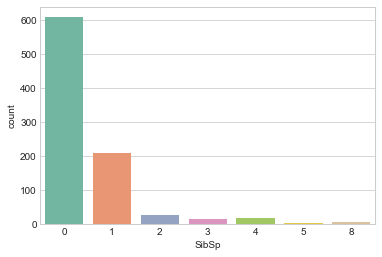

In [14]:
sns.countplot(x='SibSp', data=titanic_data,palette='Set2')

We can see that most people have been single/alone on board, and there are considrable number of people with one sibiling/partner.

Let's take a look of how much people paid to get on board:

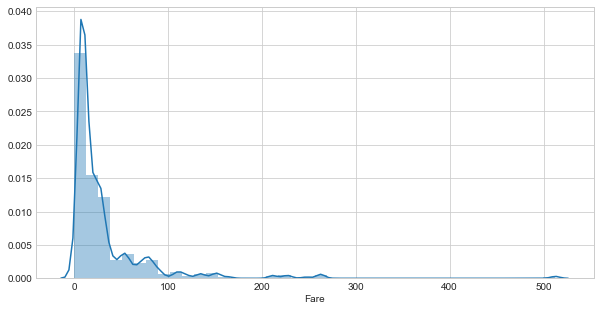

In [15]:
plt.figure(figsize=(10,5))
sns.distplot(titanic_data['Fare'], bins= 40)

We can see that most paid fares are among 0-50 dollars. Also as we previously have seen there were much more passengers in lower passenger classes.


#### Cleaning Data

As we have seen before, we have some missing data on the Age feature. There are several approaches to deal with missing data. We can simply drop the feature. However, as we have some significant data avalable, we can fill the missing data here with the mean age of all the passangers. This is called _imputation_.

We can also approach this in a smarter way, for instance, by checking the average age by passenger class:

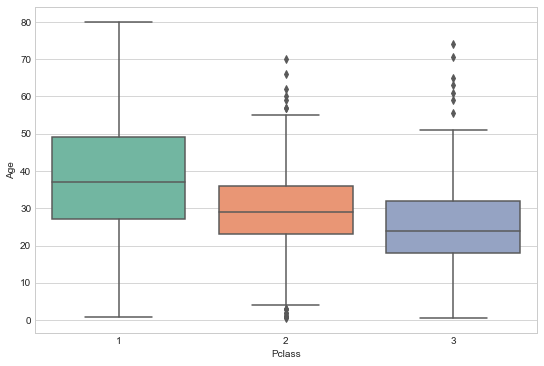

In [16]:
plt.figure(figsize=(9,6))
sns.boxplot(x='Pclass', y='Age', data=titanic_data, palette='Set2')

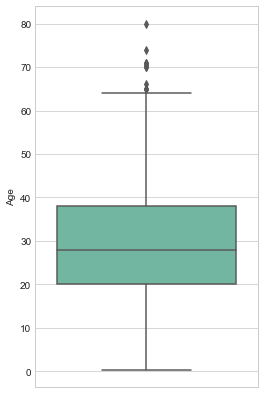

In [17]:
plt.figure(figsize=(4,7))
sns.boxplot(y='Age', data=titanic_data, palette= 'Set2')

As you can see in the boxplot, the average age of the wealthier passengers is higher that those in the second and the third class. We can use this to impute the mean age values in missing data on age based on passenger class. While the total average age seems to be around 28.

Note that there are still more elaborate approaches for filling the null values, e.g., you could create a model to fill the null values based on all other features.

In [18]:
def impute_age(cols):
    
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        elif pclass == 3:
            return 24
        else:
            return 28
        
    else:
        return age

In [19]:
titanic_data['Age'] = titanic_data[['Age', 'Pclass']].apply(impute_age, axis=1)

Now let's check the heatmap again:

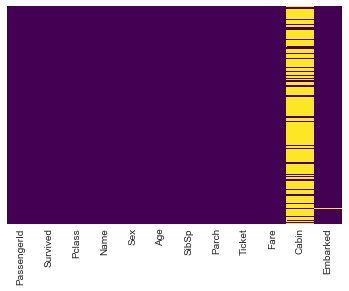

In [20]:
sns.heatmap(data=titanic_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Now we have to fix the missing data problem in the _Cabin_ column. Here there are too many missing data that we can simply drop this column.

In [21]:
titanic_data.drop(labels='Cabin', axis=1, inplace = True)

In [22]:
titanic_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


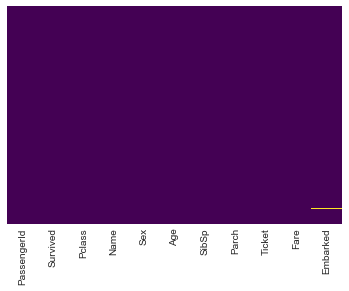

In [23]:
sns.heatmap(data=titanic_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

looking at the heatmap, we see that we also have a missing value in the _Embarked_ column. We are going to simply drop the rest of the missing value rows as they are not many:

In [24]:
titanic_data.dropna(axis=0, inplace=True)

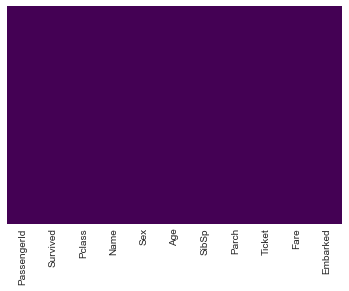

In [25]:
sns.heatmap(data=titanic_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Now we can see that we don't have any missing values anymore.

#### Converting Categorical Features 

The next step is to convert the categorical features as the machine learning algorithm won't be able to directly use these features as inputs.

We can create dummy variables that encodes the categorical features to numerical ones. e.g., the Sex feature with values _male_ and _female_ can be encoded with 1 for _male_ and 0 for _female_.

The categorical features in this dataset are Sex, and Embarked that contains the code of the port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

We can do this using get_dummies() of Pandas. Note that, if one columns value is the perfect predictor of the other, we can drop one of them. E.g., for the sex, (considering that in this dataset there are only female or male genders), if the gender is not male, we can understand that it would be female.

In [26]:
sex = pd.get_dummies(titanic_data['Sex'], drop_first = True)

In [27]:
sex.head(3)

,male
0,1
1,0
2,0


In [28]:
embark = pd.get_dummies(titanic_data['Embarked'],  drop_first=True)

In [29]:
embark.head(3)

,Q,S
0,0,1
1,0,0
2,0,1


In [30]:
titanic_data = pd.concat([titanic_data, sex, embark], axis=1)

In [31]:
titanic_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1


#### Dropring the Unused Features
Now we can go on and drop the features that we are not going to use in our model. 

The feature _Sex_ and _Embarked_ are already replaced by numerical features. Therefore, we can simply drop them.

And the features _PassengerId_, _Name_ and _Ticket_ are not useful for our model as they are kind of unique for each passenger, so they don't give us any useful information and can be dropped:

In [32]:
titanic_data.drop(labels=['PassengerId','Sex','Embarked','Name','Ticket'],axis =1, inplace = True)

In [33]:
titanic_data.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1


## Building a Logistic Regression model

### Splitting Data into Test and Training Sets
We start with splitting our data into test and train samples:

In [43]:
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

In [44]:
X.head(3)

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1


In [45]:
y.head(3)

0    0
1    1
2    1
Name: Survived, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

### Training the Logistic Regression Model
Now we can train our logistic regression model:

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
model = LogisticRegression()

In [50]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Predictions and Evaluating the Model

In [51]:
predictions = model.predict(X_test)

We can check _precision_, _recall_, _f1-score_ using classification report:

In [52]:
from sklearn.metrics import classification_report

In [55]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       163
          1       0.82      0.65      0.73       104

avg / total       0.81      0.81      0.80       267



We can also take a look at the confusion matrix directly:

In [56]:
from sklearn.metrics import confusion_matrix

In [64]:
c_matric = pd.DataFrame(confusion_matrix(y_test, predictions), index=['Deseased','Survived'], columns = ['Deseased','Survived'])

In [65]:
c_matric

,Deseased,Survived
Deseased,148,15
Survived,36,68
